# 📝 Ejercicios: Visualización de Datos con Matplotlib y Seaborn

## Instrucciones
- Completa cada ejercicio en la celda correspondiente
- Intenta resolverlos sin mirar las soluciones
- Experimenta con diferentes parámetros y personalizaciones

## 🔧 Configuración Inicial

Ejecuta esta celda primero para cargar los datos y las librerías necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")



In [6]:
# Cargar datos (ajusta la ruta según tu ubicación)
df1 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2023_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")
df2 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")

# Procesar df1
df1.columns = df1.iloc[2]
df1 = df1.drop([0, 1, 2]).reset_index(drop=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1 = df1.rename(columns={'Monthly arrivals': 'Arrivals'})
df1 = df1[['Date', 'Year', 'Month', 'ISO3 - Country of origin', 'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source']]

# Unir dataframes
df_arrivals = pd.concat([df1, df2], ignore_index=True)
df_arrivals['Arrivals'] = pd.to_numeric(df_arrivals['Arrivals'], errors='coerce')
df_arrivals['Quarter'] = pd.cut(df_arrivals['Month'], bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])

print("Datos cargados correctamente")
print(f"Total de registros: {len(df_arrivals)}")

Datos cargados correctamente
Total de registros: 3988


## 📊 Parte 1: Ejercicios Básicos de Visualización

### Ejercicio 1.1: Gráfico de Barras Verticales
**Objetivo:** Crear un gráfico de barras que muestre los 5 países de origen con menos llegadas.

**Pistas:**
- Usa `.tail(5)` en lugar de `.head(5)`
- Personaliza el color con el parámetro `color='red'`

In [9]:
df_arrivals.columns

Index(['Date', 'Year', 'Month', 'ISO3 - Country of origin',
       'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source', 'Quarter'],
      dtype='object')

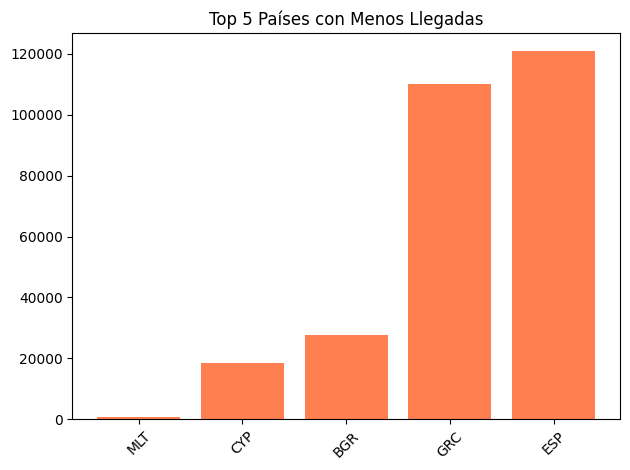

In [ ]:
# Tu código aquí
# Top 5 con menos llegadas
top5_menos = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nsmallest(5)

# Gráfico básico
plt.bar(top5_menos.index, top5_menos.values, color='coral')
plt.title('Top 5 Países con Menos Llegadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ejercicio 1.2: Gráfico de Barras Horizontales con Etiquetas
**Objetivo:** Crea un gráfico horizontal de los 10 destinos principales y añade etiquetas de valores en cada barra.

**Pistas:**
- Usa `kind='barh'`
- Aplica `ax.bar_label(ax.containers[0])`

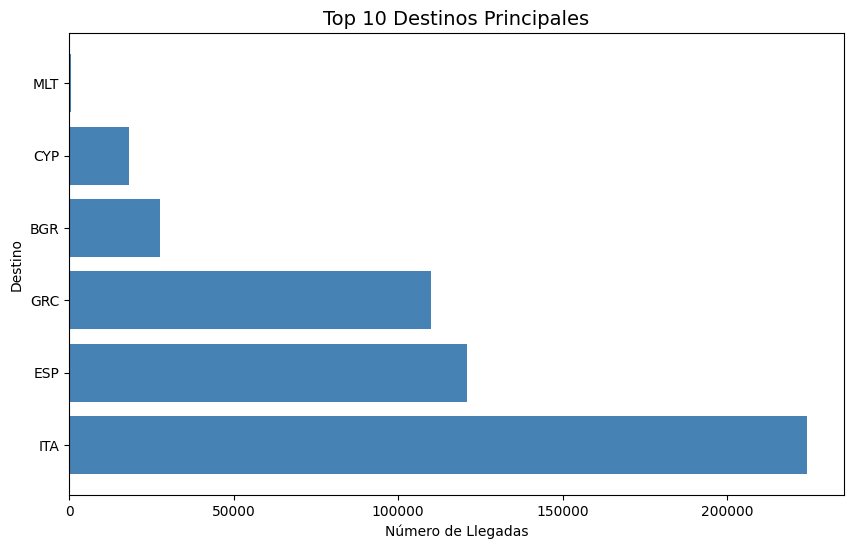

In [15]:
# Paso 1: Obtener los 10 destinos con más llegadas
top10 = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(10)

# Paso 2: Crear el gráfico horizontal
plt.figure(figsize=(10, 6))
plt.barh(top10.index, top10.values, color='steelblue')

# Paso 3: Añadir título y etiquetas
plt.title('Top 10 Destinos Principales', fontsize=14)
plt.xlabel('Número de Llegadas')
plt.ylabel('Destino')

# Paso 4: Mostrar
plt.show()

### Ejercicio 1.3: Pie Chart Personalizado
**Objetivo:** Muestra la distribución de llegadas entre los 8 principales destinos con colores personalizados.

**Pistas:**
- Usa el parámetro `colormap='Pastel1'`
- Añade `startangle=90` para rotar el gráfico
- Incluye `explode` para destacar una porción

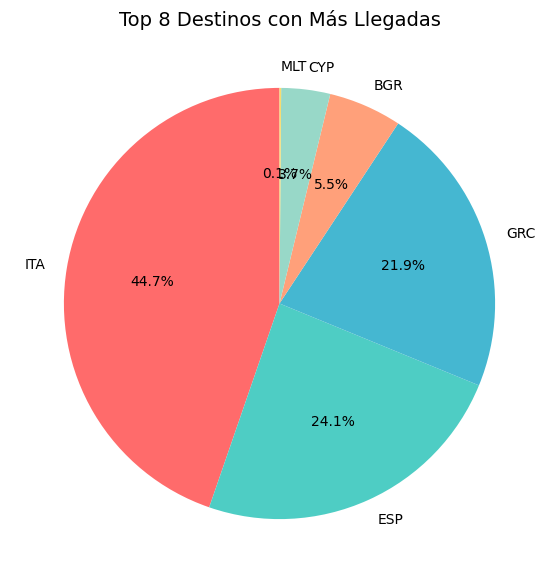

In [14]:
# Tu código aquí
# Paso 1: Encontrar los 8 destinos con más llegadas
top8_destinos = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().sort_values(ascending=False).head(8)

# Paso 2: Elegir colores bonitos para cada porción
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
           '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

# Paso 3: Crear el gráfico circular (pie chart)
plt.figure(figsize=(10, 7))

plt.pie(top8_destinos.values,           # Los valores (números)
        labels=top8_destinos.index,      # Los nombres de los destinos
        autopct='%1.1f%%',               # Mostrar porcentajes
        colors=colores,                  # Aplicar nuestros colores
        startangle=90)                   # Empezar desde arriba

# Paso 4: Añadir título
plt.title('Top 8 Destinos con Más Llegadas', fontsize=14)

# Paso 5: Mostrar el gráfico
plt.show()


## 📈 Parte 2: Visualización Temporal

### Ejercicio 2.1: Gráfico de Líneas Múltiples
**Objetivo:** Compara las llegadas mensuales de 2023 y 2024 en un solo gráfico de líneas con marcadores diferentes.

**Pistas:**
- Usa `marker='o'` para 2023 y `marker='s'` para 2024
- Añade diferentes colores con `color='blue'` y `color='orange'`

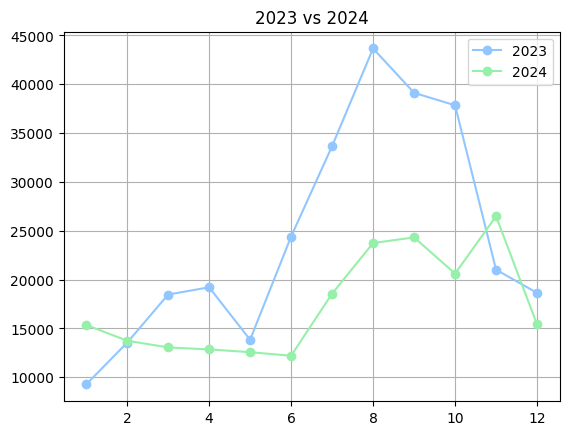

In [17]:
# Tu código aquí
# Datos mensuales por año
datos = df_arrivals.groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)

# Gráfico básico
plt.plot(datos[2023], marker='o', label='2023')
plt.plot(datos[2024], marker='o', label='2024')
plt.title('2023 vs 2024')
plt.legend()
plt.grid()
plt.show()

### Ejercicio 2.2: Análisis Trimestral
**Objetivo:** Crea un gráfico de barras agrupadas comparando Q1 vs Q2 vs Q3 vs Q4 para ambos años.

**Pistas:**
- Usa `stacked=False` para barras agrupadas
- Aplica `rot=0` para etiquetas horizontales

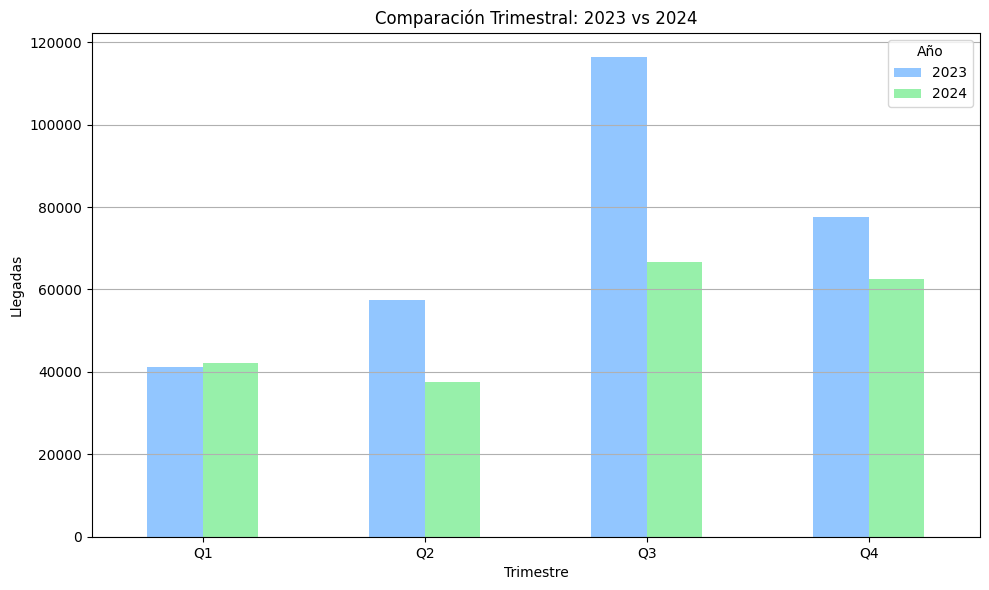

In [18]:
# Tu código aquí
# Crear columna de trimestre
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)

# Datos por año y trimestre
datos_trim = df_arrivals.groupby(['Year', 'Trimestre'])['Arrivals'].sum().unstack(level=0)

# Gráfico de barras agrupadas
datos_trim.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación Trimestral: 2023 vs 2024')
plt.xlabel('Trimestre')
plt.ylabel('Llegadas')
plt.legend(title='Año')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Ejercicio 2.3: Tendencia con Área
**Objetivo:** Crea un gráfico de área (`kind='area'`) mostrando la evolución mensual total de llegadas.

**Pistas:**
- Agrupa solo por 'Month' sumando todas las llegadas
- Usa `alpha=0.5` para transparencia

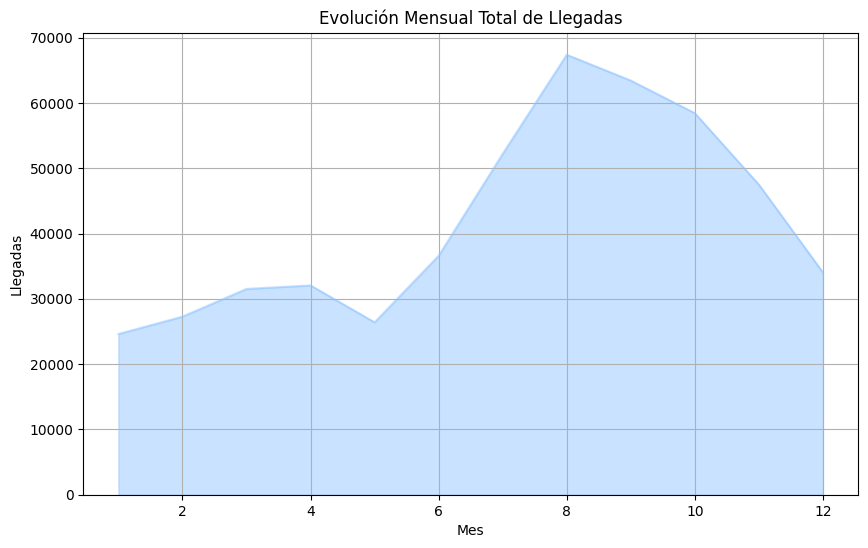

In [19]:
# Tu código aquí
# Agrupar llegadas totales por mes
llegadas_mes = df_arrivals.groupby('Month')['Arrivals'].sum()

# Gráfico de área
llegadas_mes.plot(kind='area', alpha=0.5, figsize=(10, 6))
plt.title('Evolución Mensual Total de Llegadas')
plt.xlabel('Mes')
plt.ylabel('Llegadas')
plt.grid(True)
plt.show()

## 🔥 Parte 3: Heatmaps y Visualización Multivariada

### Ejercicio 3.1: Heatmap Personalizado
**Objetivo:** Crea un heatmap de los 5 principales orígenes vs los 5 principales destinos.

**Pistas:**
- Usa `cmap='YlOrRd'` para un mapa de calor rojo-amarillo
- Añade `linewidths=0.5` para separar las celdas
- Usa `fmt='.0f'` para números enteros en anotaciones

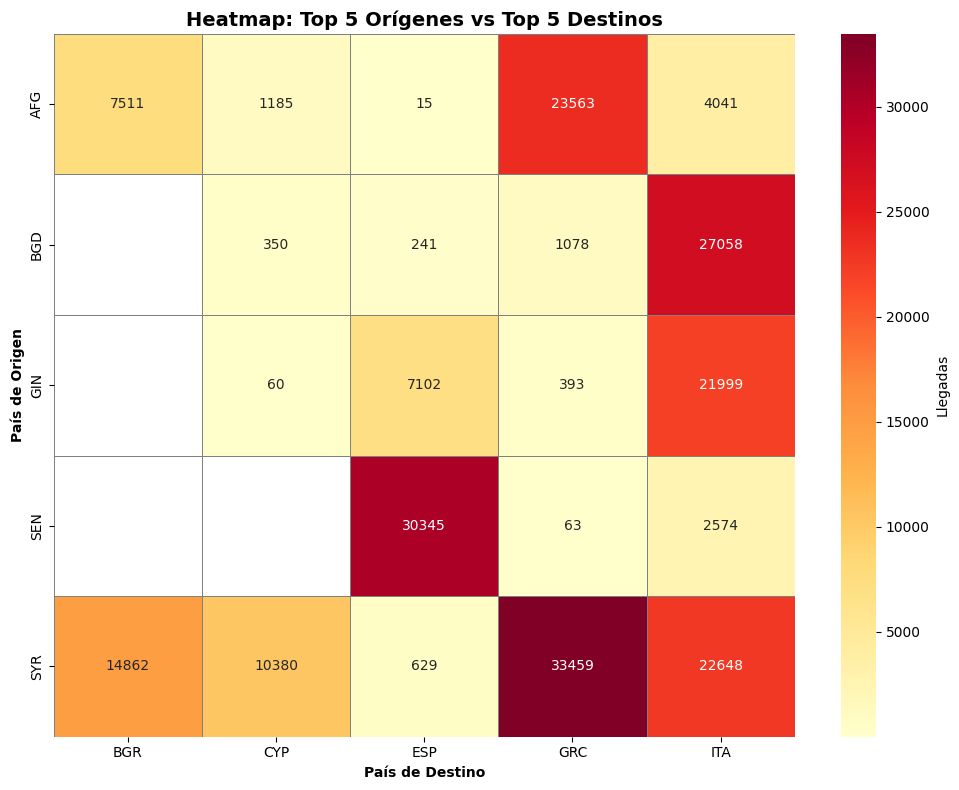

In [22]:
# Tu código aquí
import seaborn as sns

# Paso 1: Identificar top 5 orígenes y destinos
top5_origenes = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(5).index
top5_destinos = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5).index

# Paso 2: Filtrar datos
df_filtrado = df_arrivals[
    (df_arrivals['ISO3 - Country of origin'].isin(top5_origenes)) & 
    (df_arrivals['ISO3 - Country of arrival'].isin(top5_destinos))
]

# Paso 3: Crear tabla pivote
heatmap_data = df_filtrado.pivot_table(
    values='Arrivals',
    index='ISO3 - Country of origin',
    columns='ISO3 - Country of arrival',
    aggfunc='sum'
)

# Paso 4: Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, 
            annot=True,           # Mostrar números
            fmt='.0f',            # Sin decimales
            cmap='YlOrRd',        # Colores amarillo-rojo
            linewidths=0.5,       # Líneas entre celdas
            linecolor='gray',     # Color de las líneas
            cbar_kws={'label': 'Llegadas'})  # Etiqueta de la barra de color

plt.title('Heatmap: Top 5 Orígenes vs Top 5 Destinos', fontsize=14, fontweight='bold')
plt.xlabel('País de Destino', fontweight='bold')
plt.ylabel('País de Origen', fontweight='bold')
plt.tight_layout()
plt.show()

### Ejercicio 3.2: Matriz de Correlación (Avanzado)
**Objetivo:** Crea una matriz que muestre la correlación entre meses (¿qué meses tienen patrones similares de llegadas?).

**Pistas:**
- Crea una tabla pivote: filas=Month, columnas=Country of arrival, valores=Arrivals
- Usa `.corr()` para calcular correlaciones
- Aplica `sns.heatmap()`

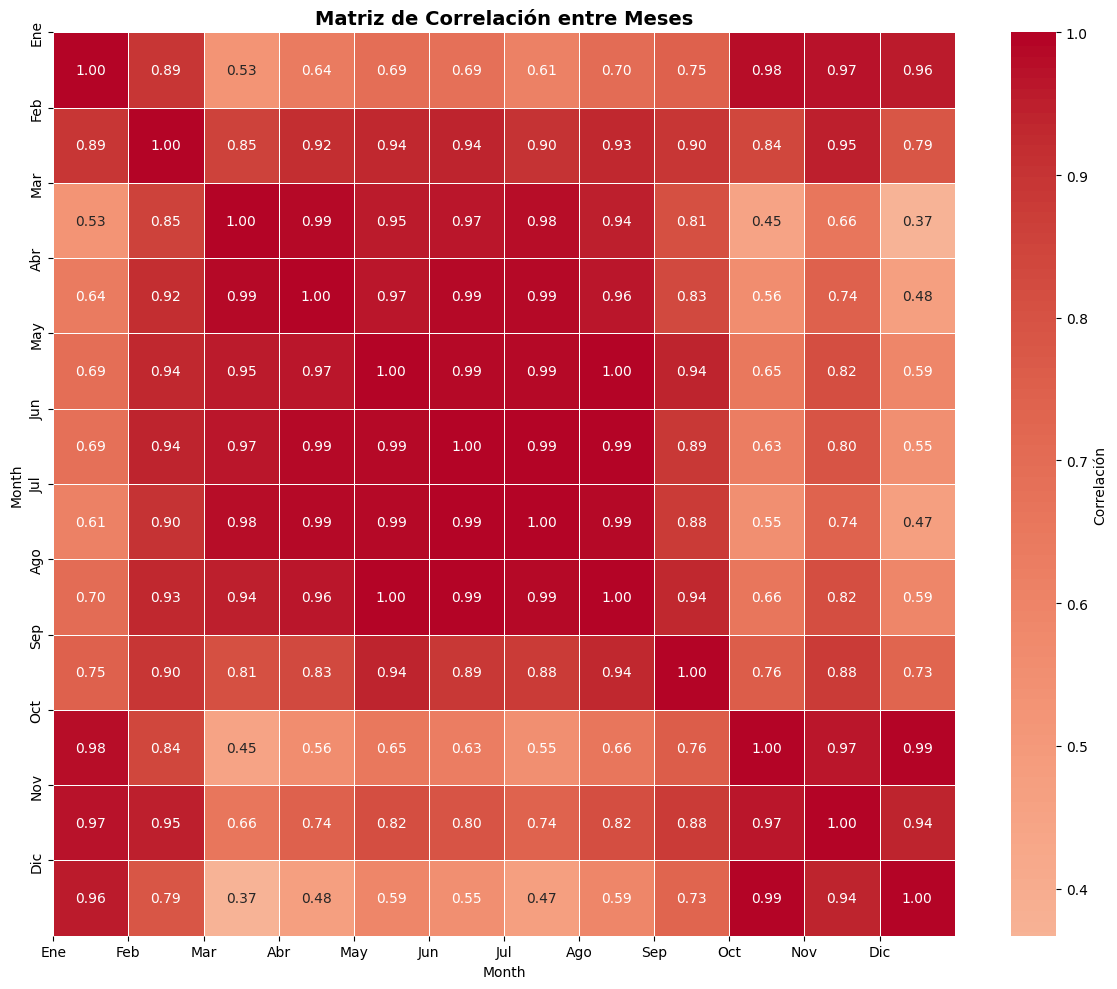

In [23]:
# Tu código aquí
import seaborn as sns

# Paso 1: Crear tabla pivote (mes vs país)
pivot_meses = df_arrivals.pivot_table(
    values='Arrivals',
    index='Month',
    columns='ISO3 - Country of arrival',
    aggfunc='sum'
)

# Paso 2: Calcular correlación entre meses
correlacion = pivot_meses.T.corr()

# Paso 3: Crear heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlación'})

# Nombres de meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(12), meses)
plt.yticks(range(12), meses)

plt.title('Matriz de Correlación entre Meses', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 🎯 Parte 4: Ejercicios de Análisis Específico

### Ejercicio 4.1: Comparación de Rutas
**Objetivo:** Identifica y visualiza las 3 rutas más utilizadas hacia España.

**Pistas:**
- Filtra por `'ISO3 - Country of arrival'=='ESP'`
- Agrupa por origen
- Usa un gráfico de barras con colores degradados

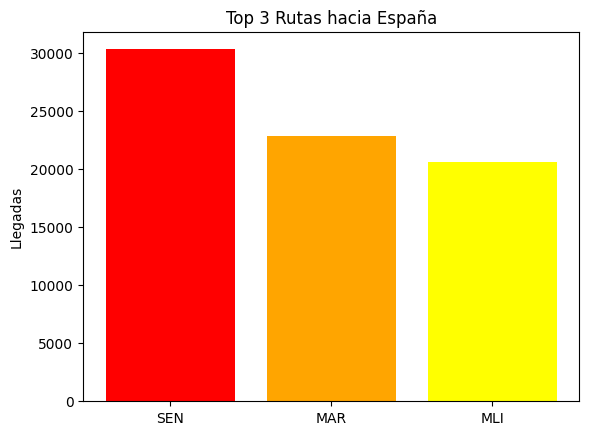

In [24]:
# Tu código aquí
# Filtrar llegadas a España y obtener top 3 orígenes
llegadas_esp = df_arrivals[df_arrivals['ISO3 - Country of arrival'] == 'ESP']
top3 = llegadas_esp.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(3)

# Gráfico
plt.bar(top3.index, top3.values, color=['red', 'orange', 'yellow'])
plt.title('Top 3 Rutas hacia España')
plt.ylabel('Llegadas')
plt.show()


### Ejercicio 4.2: Análisis de Estacionalidad
**Objetivo:** Crea un gráfico que muestre si hay estacionalidad (¿ciertos meses tienen más llegadas?).

**Pistas:**
- Agrupa por Month sin Year
- Calcula la media de llegadas por mes
- Usa un gráfico de líneas con área sombreada

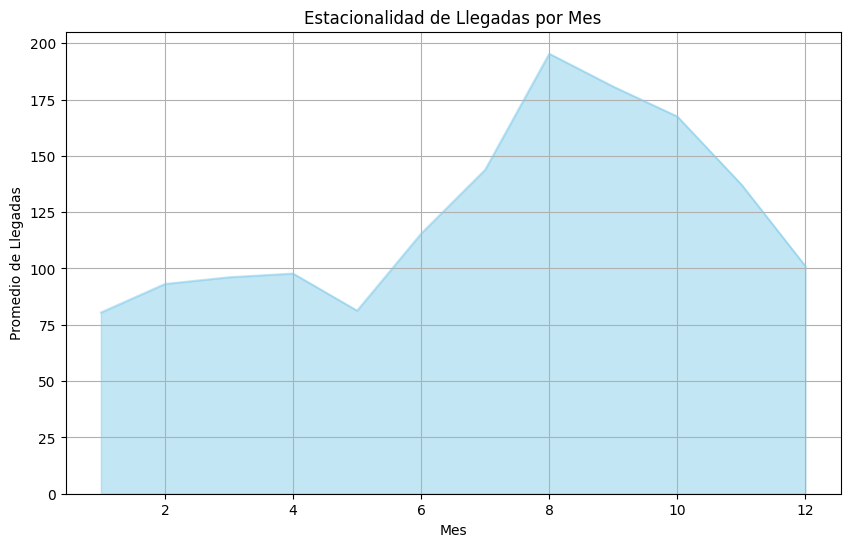

In [25]:
# Tu código aquí
# Promedio de llegadas por mes
promedio_mes = df_arrivals.groupby('Month')['Arrivals'].mean()

# Gráfico de área
promedio_mes.plot(kind='area', alpha=0.5, color='skyblue', figsize=(10, 6))
plt.title('Estacionalidad de Llegadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Llegadas')
plt.grid(True)
plt.show()

### Ejercicio 4.3: Top Destinos por Trimestre
**Objetivo:** Crea 4 subgráficos (uno por trimestre) mostrando los top 5 destinos en cada uno.

**Pistas:**
- Usa `plt.subplots(2, 2, figsize=(12,10))`
- Filtra por Quarter
- Crea un bucle for para cada trimestre

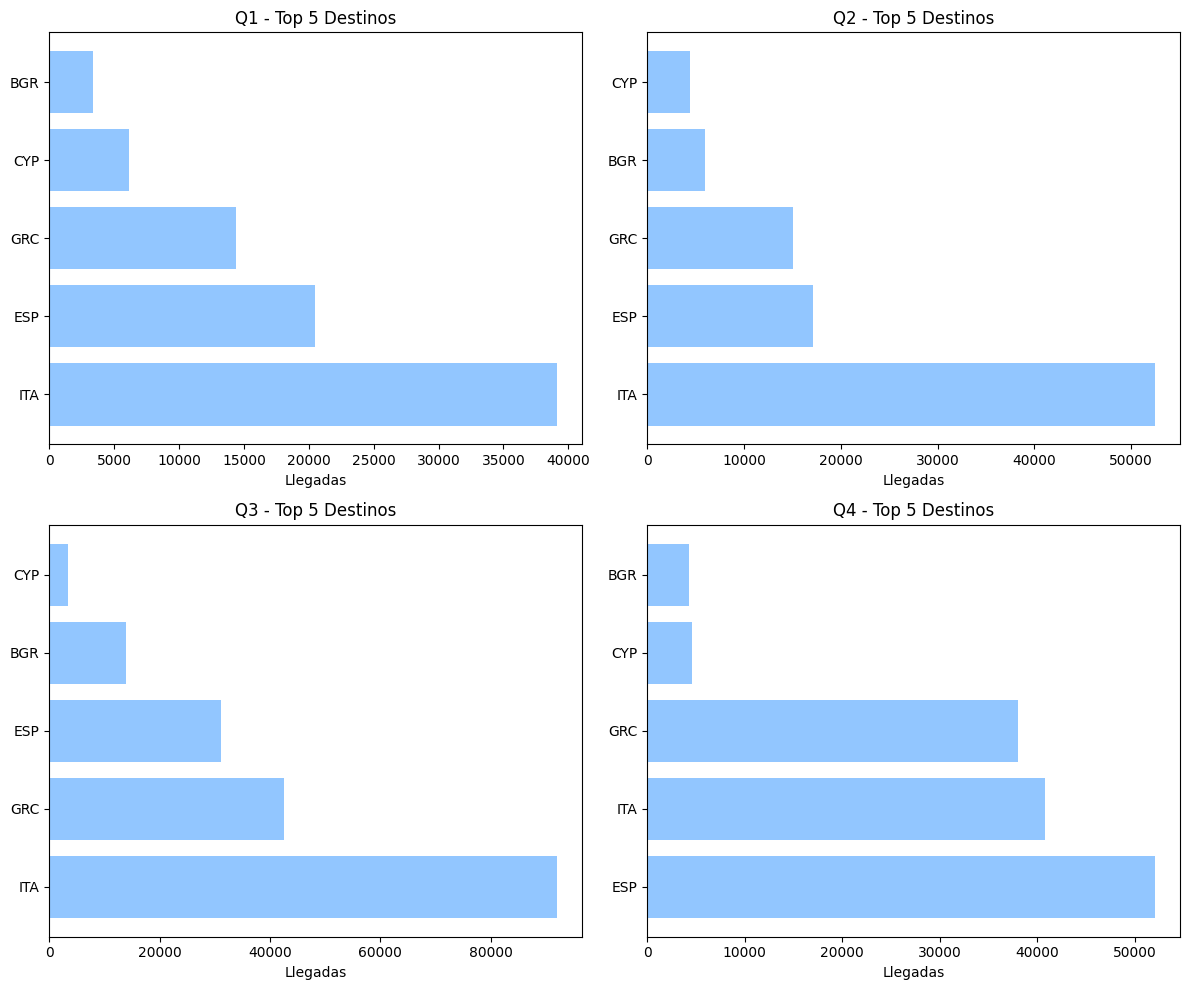

In [26]:
# Tu código aquí
# Crear trimestre
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)

# Crear 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Top 5 destinos para cada trimestre
for i, trimestre in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    datos = df_arrivals[df_arrivals['Trimestre'] == trimestre]
    top5 = datos.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5)
    
    axes[i].barh(top5.index, top5.values)
    axes[i].set_title(f'{trimestre} - Top 5 Destinos')
    axes[i].set_xlabel('Llegadas')

plt.tight_layout()
plt.show()

## 🚀 Parte 5: Proyecto Integrador

### Ejercicio 5.1: Dashboard Completo
**Objetivo:** Crea un dashboard con 6 visualizaciones en una sola figura.

**Requisitos:**
1. Top 5 destinos (barras)
2. Top 5 orígenes (barras horizontales)
3. Evolución mensual 2023 vs 2024 (líneas)
4. Distribución por trimestre (pie)
5. Heatmap origen-destino (top 5x5)
6. Llegadas a España por mes (área)

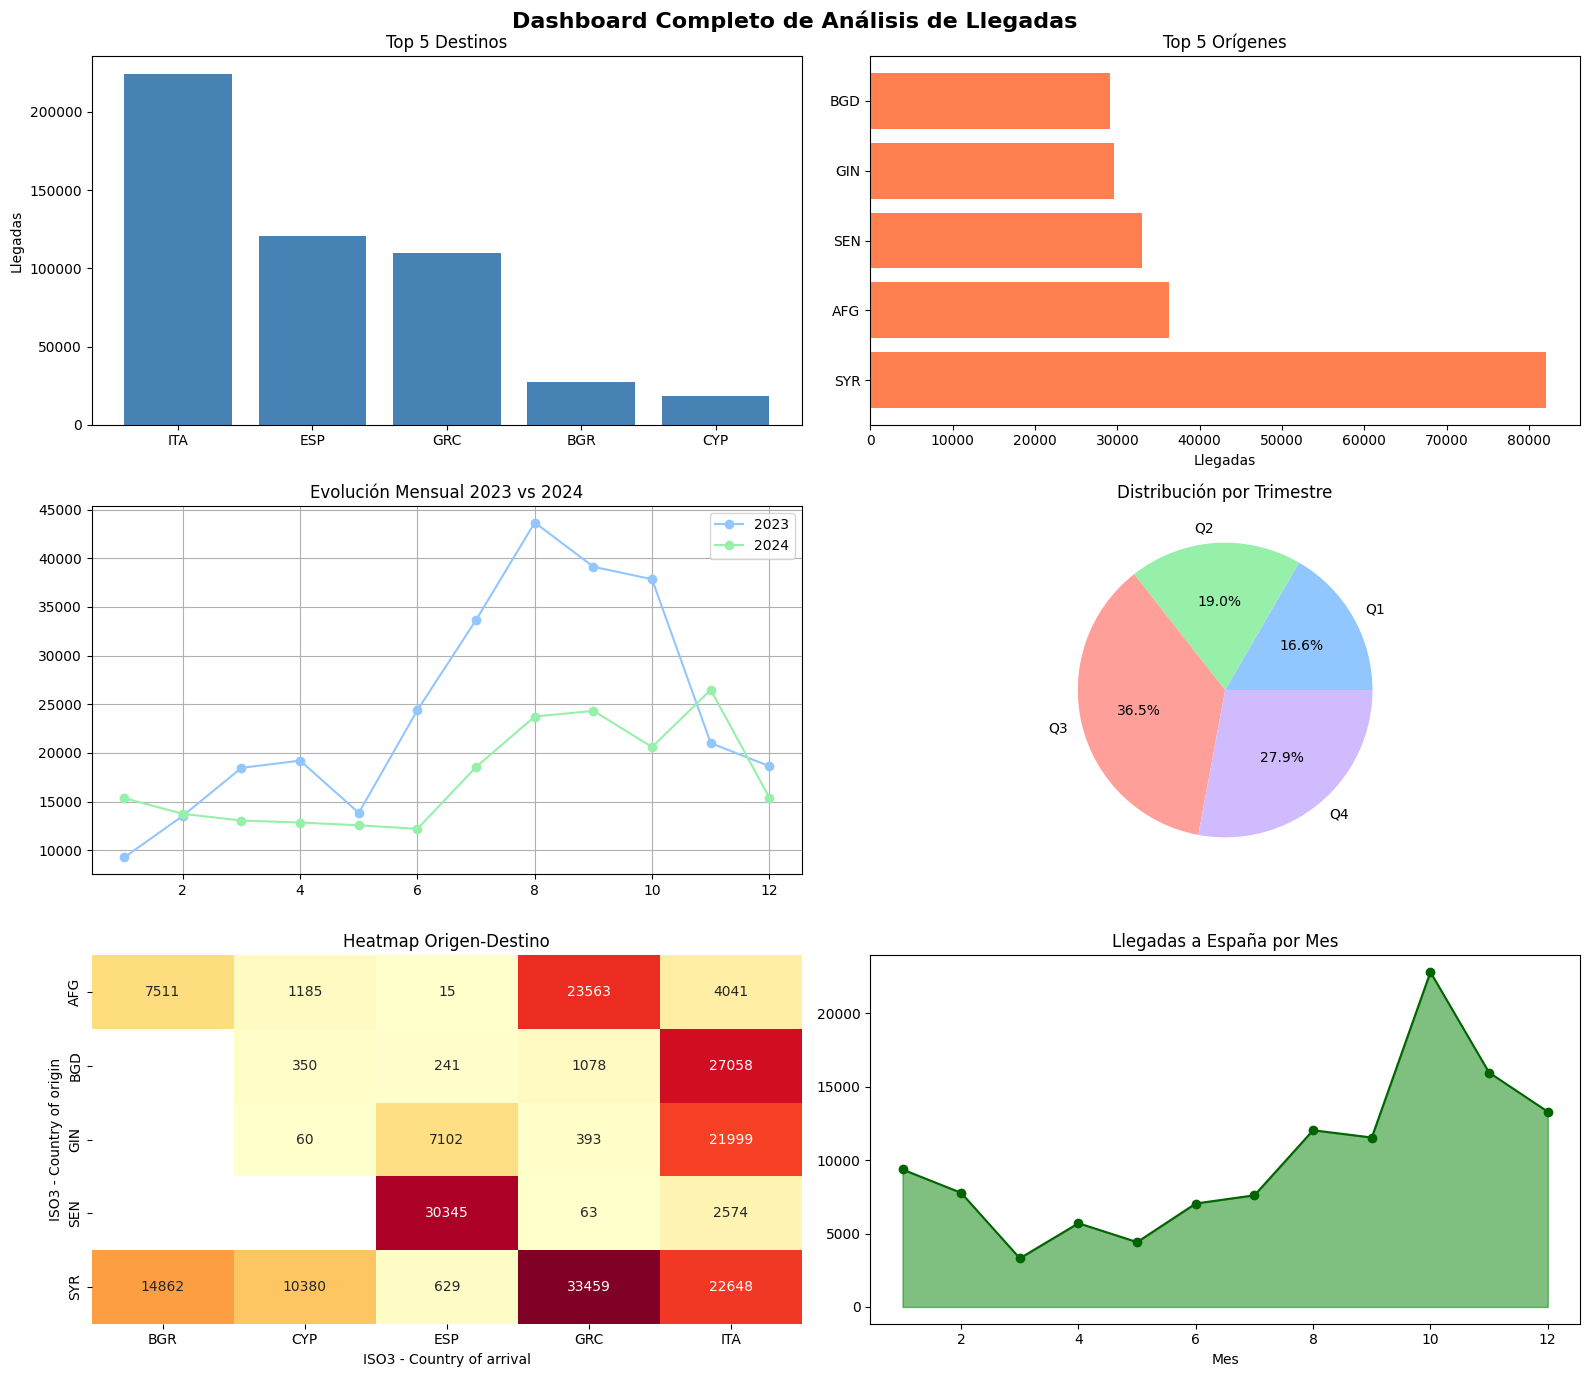

In [28]:
# Tu código aquí
# Pista: fig, axes = plt.subplots(3, 2, figsize=(15, 12))

import seaborn as sns

# Preparar datos
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)

# Crear figura con 6 subgráficos
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1. Top 5 destinos
top5_dest = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5)
axes[0, 0].bar(top5_dest.index, top5_dest.values, color='steelblue')
axes[0, 0].set_title('Top 5 Destinos')
axes[0, 0].set_ylabel('Llegadas')

# 2. Top 5 orígenes
top5_orig = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(5)
axes[0, 1].barh(top5_orig.index, top5_orig.values, color='coral')
axes[0, 1].set_title('Top 5 Orígenes')
axes[0, 1].set_xlabel('Llegadas')

# 3. Evolución mensual 2023 vs 2024
datos_mes = df_arrivals.groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)
axes[1, 0].plot(datos_mes.index, datos_mes[2023], marker='o', label='2023')
axes[1, 0].plot(datos_mes.index, datos_mes[2024], marker='o', label='2024')
axes[1, 0].set_title('Evolución Mensual 2023 vs 2024')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Distribución por trimestre
trim_dist = df_arrivals.groupby('Trimestre')['Arrivals'].sum()
axes[1, 1].pie(trim_dist.values, labels=trim_dist.index, autopct='%1.1f%%')
axes[1, 1].set_title('Distribución por Trimestre')

# 5. Heatmap origen-destino
top5_o = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(5).index
top5_d = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5).index
df_filt = df_arrivals[(df_arrivals['ISO3 - Country of origin'].isin(top5_o)) & 
                      (df_arrivals['ISO3 - Country of arrival'].isin(top5_d))]
hm = df_filt.pivot_table(values='Arrivals', index='ISO3 - Country of origin', 
                         columns='ISO3 - Country of arrival', aggfunc='sum')
sns.heatmap(hm, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2, 0], cbar=False)
axes[2, 0].set_title('Heatmap Origen-Destino')

# 6. Llegadas a España por mes
esp_mes = df_arrivals[df_arrivals['ISO3 - Country of arrival'] == 'ESP'].groupby('Month')['Arrivals'].sum()
axes[2, 1].fill_between(esp_mes.index, esp_mes.values, alpha=0.5, color='green')
axes[2, 1].plot(esp_mes.index, esp_mes.values, color='darkgreen', marker='o')
axes[2, 1].set_title('Llegadas a España por Mes')
axes[2, 1].set_xlabel('Mes')

plt.suptitle('Dashboard Completo de Análisis de Llegadas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# 📊 Explicación del Dashboard Completo

## 🎯 ¿Qué es un Dashboard?

Un **dashboard** es como un panel de control que te muestra múltiples visualizaciones en una sola pantalla. Es perfecto para tener una visión completa de tus datos de un vistazo.

---

## 🏗️ Estructura del Código

### 📦 **Paso 1: Preparar los Datos**

```python
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)
```

**¿Qué hace?**
- ✅ Crea una nueva columna llamada `Trimestre`
- ✅ Convierte cada mes en su trimestre correspondiente:
  - Enero, Febrero, Marzo → **Q1**
  - Abril, Mayo, Junio → **Q2**
  - Julio, Agosto, Septiembre → **Q3**
  - Octubre, Noviembre, Diciembre → **Q4**

---

### 🖼️ **Paso 2: Crear la Estructura de Subgráficos**

```python
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
```

**¿Qué significa?**
- 📐 `3, 2` = 3 filas y 2 columnas = **6 espacios** para gráficos
- 📏 `figsize=(16, 14)` = Tamaño de la figura completa

**Visualización de la estructura:**
```
┌─────────────┬─────────────┐
│  Gráfico 1  │  Gráfico 2  │  ← Fila 1
├─────────────┼─────────────┤
│  Gráfico 3  │  Gráfico 4  │  ← Fila 2
├─────────────┼─────────────┤
│  Gráfico 5  │  Gráfico 6  │  ← Fila 3
└─────────────┴─────────────┘
```

---

## 📈 Los 6 Gráficos Explicados

### 1️⃣ **Top 5 Destinos (Barras Verticales)** 📍

```python
top5_dest = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5)
axes[0, 0].bar(top5_dest.index, top5_dest.values, color='steelblue')
```

**¿Qué muestra?**
- 🏆 Los 5 países que **reciben más llegadas**
- 📊 Barras verticales (hacia arriba)
- 🎨 Color azul acero (`steelblue`)

**Posición:** Fila 0, Columna 0 (arriba izquierda)

---

### 2️⃣ **Top 5 Orígenes (Barras Horizontales)** 🛫

```python
top5_orig = df_arrivals.groupby('ISO3 - Country of departure')['Arrivals'].sum().nlargest(5)
axes[0, 1].barh(top5_orig.index, top5_orig.values, color='coral')
```

**¿Qué muestra?**
- 🌍 Los 5 países que **más viajeros envían**
- ↔️ Barras horizontales (hacia la derecha)
- 🎨 Color coral (naranja-rojizo)

**Posición:** Fila 0, Columna 1 (arriba derecha)

**💡 Diferencia clave:**
- `axes[0, 0].bar()` → Barras **verticales** ⬆️
- `axes[0, 1].barh()` → Barras **horizontales** ➡️

---

### 3️⃣ **Evolución Mensual 2023 vs 2024 (Líneas)** 📈

```python
datos_mes = df_arrivals.groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)
axes[1, 0].plot(datos_mes.index, datos_mes[2023], marker='o', label='2023')
axes[1, 0].plot(datos_mes.index, datos_mes[2024], marker='o', label='2024')
```

**¿Qué muestra?**
- 📅 Cómo cambian las llegadas **mes a mes**
- 🔵 Línea para 2023
- 🔴 Línea para 2024
- 🔍 Permite **comparar** ambos años

**Posición:** Fila 1, Columna 0 (medio izquierda)

**Conceptos clave:**
- `.unstack(level=0)` → Separa los años en columnas diferentes
- `marker='o'` → Añade círculos en cada punto

---

### 4️⃣ **Distribución por Trimestre (Pie Chart)** 🥧

```python
trim_dist = df_arrivals.groupby('Trimestre')['Arrivals'].sum()
axes[1, 1].pie(trim_dist.values, labels=trim_dist.index, autopct='%1.1f%%')
```

**¿Qué muestra?**
- 📊 Qué porcentaje de llegadas tiene **cada trimestre**
- 🍰 Gráfico circular (pie chart)
- 📌 Etiquetas: Q1, Q2, Q3, Q4
- 🔢 Porcentajes automáticos con `autopct`

**Posición:** Fila 1, Columna 1 (medio derecha)

---

### 5️⃣ **Heatmap Origen-Destino (Top 5x5)** 🔥

```python
top5_o = df_arrivals.groupby('ISO3 - Country of departure')['Arrivals'].sum().nlargest(5).index
top5_d = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5).index
df_filt = df_arrivals[(df_arrivals['ISO3 - Country of departure'].isin(top5_o)) & 
                      (df_arrivals['ISO3 - Country of arrival'].isin(top5_d))]
hm = df_filt.pivot_table(values='Arrivals', index='ISO3 - Country of departure', 
                         columns='ISO3 - Country of arrival', aggfunc='sum')
sns.heatmap(hm, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2, 0], cbar=False)
```

**¿Qué muestra?**
- 🗺️ Matriz de **rutas más populares**
- 🔥 Colores: Amarillo (bajo) → Rojo (alto)
- 📊 Filas = Países de origen
- 📊 Columnas = Países de destino
- 🔢 Números en cada celda

**Posición:** Fila 2, Columna 0 (abajo izquierda)

**Pasos del heatmap:**
1. Obtener top 5 orígenes (`top5_o`)
2. Obtener top 5 destinos (`top5_d`)
3. Filtrar datos para esos países (`df_filt`)
4. Crear tabla pivote (`pivot_table`)
5. Visualizar con `sns.heatmap()`

---

### 6️⃣ **Llegadas a España por Mes (Área)** 🇪🇸

```python
esp_mes = df_arrivals[df_arrivals['ISO3 - Country of arrival'] == 'ESP'].groupby('Month')['Arrivals'].sum()
axes[2, 1].fill_between(esp_mes.index, esp_mes.values, alpha=0.5, color='green')
axes[2, 1].plot(esp_mes.index, esp_mes.values, color='darkgreen', marker='o')
```

**¿Qué muestra?**
- 🇪🇸 Llegadas específicamente a **España**
- 📈 Gráfico de área (relleno bajo la línea)
- 🟢 Color verde con transparencia
- 📍 Marcadores en cada mes

**Posición:** Fila 2, Columna 1 (abajo derecha)

**Técnica:**
- `fill_between()` → Crea el área sombreada
- `plot()` → Añade la línea encima
- `alpha=0.5` → 50% de transparencia

---

## 🎨 Toques Finales

### **Título General**
```python
plt.suptitle('Dashboard Completo de Análisis de Llegadas', fontsize=16, fontweight='bold')
```
- 📝 `suptitle` = Título superior para toda la figura
- 🔠 `fontsize=16` = Tamaño de letra grande
- 💪 `fontweight='bold'` = Negrita

### **Ajustar Espaciado**
```python
plt.tight_layout()
```
- ✨ Ajusta automáticamente los márgenes
- 🎯 Evita que los gráficos se superpongan
- 📐 Optimiza el uso del espacio

---

## 🗺️ Mapa de Posiciones en el Dashboard

```
axes[0, 0] → Top 5 Destinos (barras)
axes[0, 1] → Top 5 Orígenes (barras horizontales)
axes[1, 0] → Evolución 2023 vs 2024 (líneas)
axes[1, 1] → Distribución Trimestral (pie)
axes[2, 0] → Heatmap Origen-Destino (mapa de calor)
axes[2, 1] → Llegadas a España (área)
```

---

## 📚 Conceptos Clave Aprendidos

### 🔹 **Subplots (Subgráficos)**
```python
fig, axes = plt.subplots(filas, columnas, figsize=(ancho, alto))
```
Crea múltiples gráficos en una sola figura.

### 🔹 **Indexación de Axes**
```python
axes[fila, columna]  # Para acceder a cada subgráfico
axes[0, 0]  # Primer gráfico (arriba izquierda)
axes[2, 1]  # Último gráfico (abajo derecha)
```

### 🔹 **Tipos de Gráficos Usados**
- 📊 `bar()` → Barras verticales
- ↔️ `barh()` → Barras horizontales
- 📈 `plot()` → Líneas
- 🥧 `pie()` → Circular
- 🔥 `sns.heatmap()` → Mapa de calor
- 🏔️ `fill_between()` → Área

---

## 🚀 Siguiente Nivel

Para mejorar tu dashboard podrías:
- 🎨 Usar colores consistentes entre gráficos
- 📊 Añadir más métricas (promedios, totales)
- 🔄 Hacerlo interactivo con bibliotecas como Plotly
- 💾 Guardarlo como imagen con `plt.savefig('dashboard.png')`
- 📱 Adaptarlo a diferentes tamaños de pantalla

---

## 💡 Ejercicios Bonus (Desafío)

### Bonus 1: Crecimiento Interanual
Calcula y visualiza el crecimiento porcentual mes a mes entre 2023 y 2024 usando un gráfico de barras con colores condicionales (verde para crecimiento, rojo para decrecimiento).

In [ ]:
# Tu código aquí


### Bonus 2: Análisis de Rutas Específicas
Identifica la ruta (origen-destino) con mayor variación entre 2023 y 2024 y crea una visualización que muestre esta tendencia.

In [ ]:
# Tu código aquí


### Bonus 3: Visualización Estilo Infografía
Combina texto, números y gráficos para crear una infografía que resuma:
- Total de llegadas
- Top 3 destinos
- Mes con más llegadas
- Crecimiento vs año anterior

In [ ]:
# Tu código aquí
# Pista: Usa plt.text() para añadir texto a la figura
